In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

dataframe = pd.read_csv('DSCancerDeMamaSinDatosPerdidos.csv', sep=';')

In [26]:
dataframe.head(10)
clasificadores = ['Benigno','Maligno']

In [28]:
y = dataframe['Severity']
x = dataframe.drop( 'Severity',axis=1)

In [30]:
dataframe.groupby('Severity').size()

Severity
0    425
1    395
dtype: int64

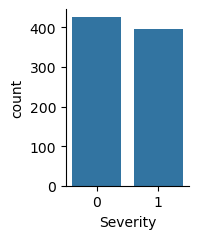

In [32]:
sb.catplot(x = 'Severity',data=dataframe,kind="count",height=2.5,aspect=.8)

In [34]:
y = dataframe['Severity']
x = dataframe.drop('Severity',axis=1)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=5)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

labels = ["Benigno","Maligno"]
matriz = confusion_matrix(y_test,predicciones, labels=[0,1])
print(pd.DataFrame(matriz, index = labels, columns = labels))

print(classification_report(y_test,predicciones,target_names=clasificadores))

         Benigno  Maligno
Benigno      104       15
Maligno       27      100
              precision    recall  f1-score   support

     Benigno       0.79      0.87      0.83       119
     Maligno       0.87      0.79      0.83       127

    accuracy                           0.83       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.83      0.83      0.83       246



In [38]:
print(knn_mm.predict([[4,65,3,5,3]]))
print(knn_mm.predict_proba([[4,65,3,5,3]]))


[1]
[[0.4 0.6]]


C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
